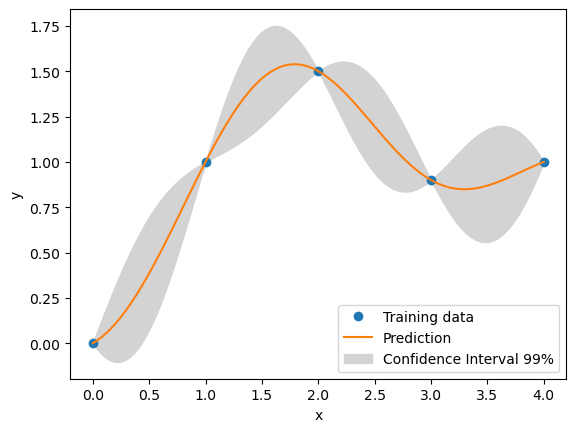

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import egobox as egx
import logging

logging.basicConfig(level=logging.INFO)

xt = np.array([[0.0, 1.0, 2.0, 3.0, 4.0]]).T
yt = np.array([[0.0, 1.0, 1.5, 0.9, 1.0]]).T

sm = egx.Gpx.builder()
sm.set_training_values(xt, yt)
gpx = sm.train()

num = 100
x = np.linspace(0.0, 4.0, num).reshape((-1, 1))

y = gpx.predict_values(x)
# estimated variances
s2 = gpx.predict_variances(x)

fig, axs = plt.subplots(1)

# add a plot with variances
axs.plot(xt, yt, "o")
axs.plot(x, y)
axs.fill_between(
    np.ravel(x),
    np.ravel(y - 3 * np.sqrt(s2)),
    np.ravel(y + 3 * np.sqrt(s2)),
    color="lightgrey",
)
axs.set_xlabel("x")
axs.set_ylabel("y")
axs.legend(
    ["Training data", "Prediction", "Confidence Interval 99%"],
    loc="lower right",
)

plt.show()